### Notebook for the manual annotation of cell states and excluding stromal

- **Developed by:** Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius-Maximilian-Universität Würzburg**
- v231127

### Import required modules

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

from SCCAF import SCCAF_assessment, plot_roc

### Set up working environment

In [19]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                 10.3.0
SCCAF               NA
asttokens           NA
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.1
decorator           5.1.1
distutils           3.12.3
executing           2.0.1
h5py                3.11.0
igraph              0.11.5
ipykernel           6.29.4
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.42.0
louvain             0.8.2
matplotlib          3.9.0
matplotlib_inline   0.1.7
mpl_toolkits        NA
natsort             8.4.0
numba               0.59.1
numexpr             2.10.0
numpy               1.26.4
packaging           24.0
pandas              2.2.2
parso               0.8.4
patsy               0.5.6
pkg_resources       NA
platformdirs        4.2.2
prompt_toolkit      3.0.44
psutil        

### Read in Healthy-CTRL dataset

In [3]:
adata = sc.read_h5ad('../data/heart_mm_nuclei-23-0092_scANVI-Lymphoid_states_ctl240527.raw.h5ad') 
adata

AnnData object with n_obs × n_vars = 65544 × 16060
    obs: 'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_type', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
    var: 'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD

### Visualise manifold with `scANVI` annotation

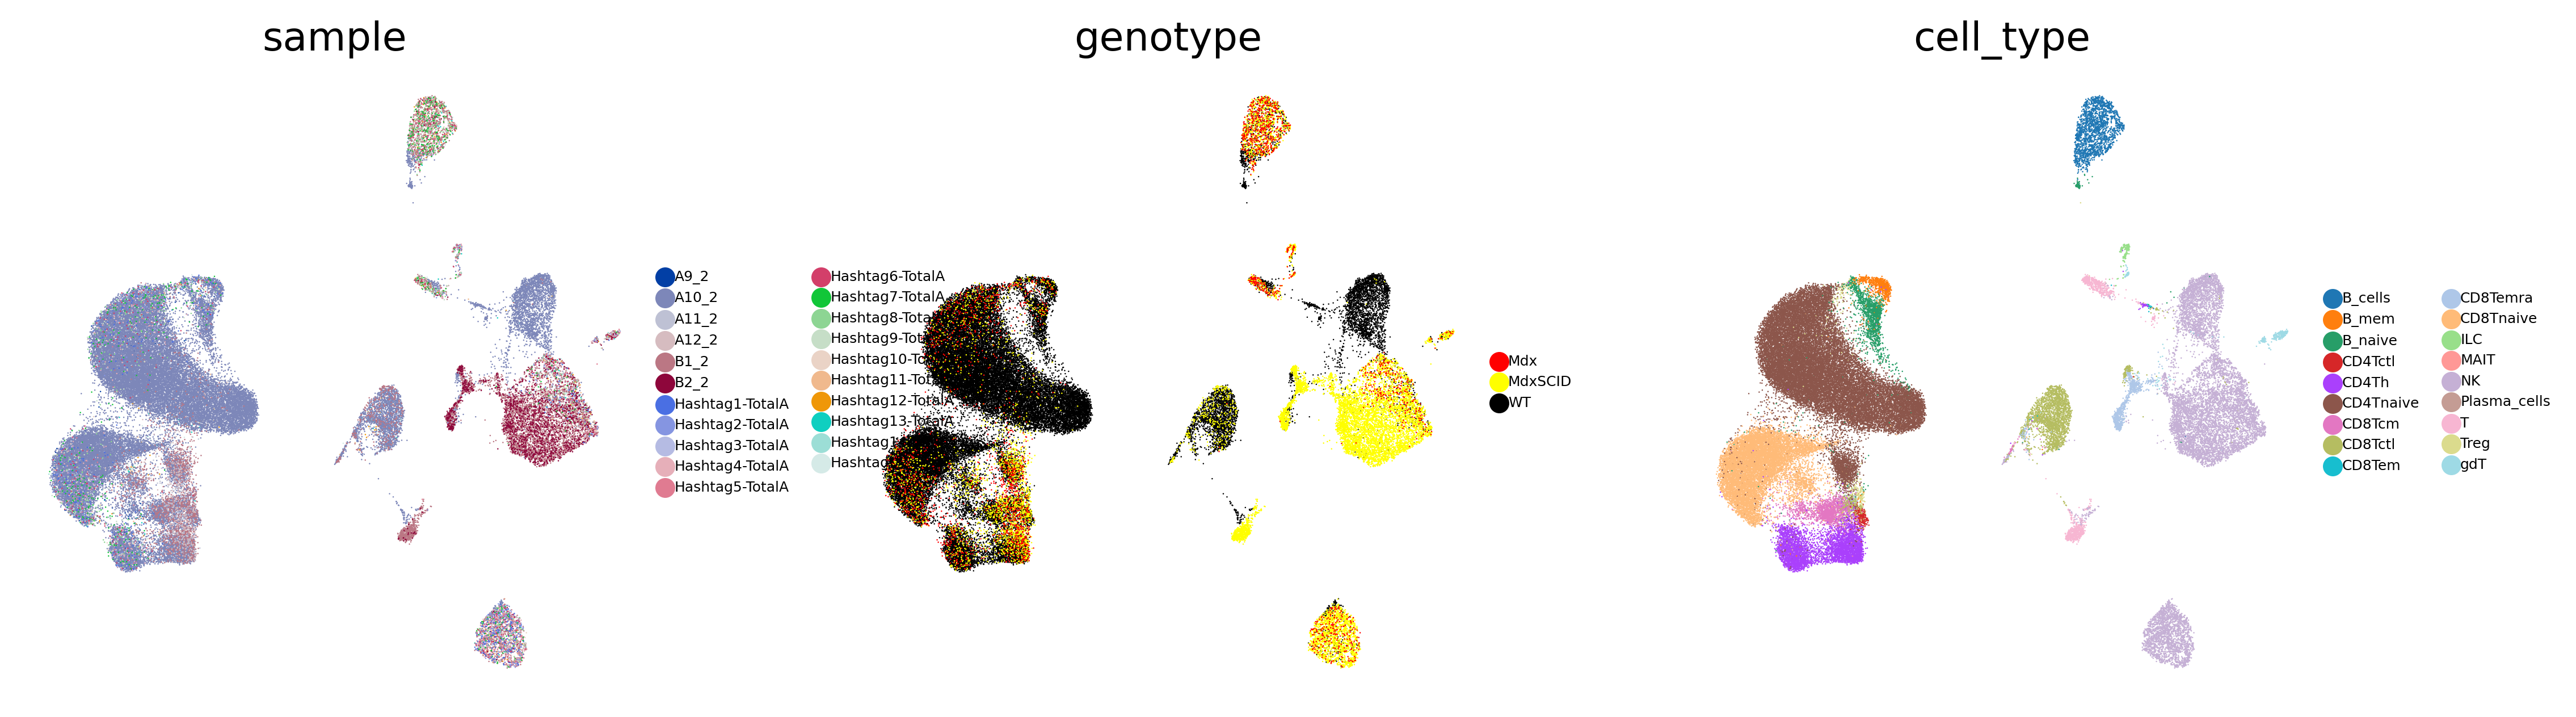

In [4]:
sc.pl.umap(adata, frameon = False, color = ['sample', 'genotype', 'cell_type'], size = 1, legend_fontsize = 5, ncols = 3)

### Cluster manifold using `leiden` with resolution of `1.0`

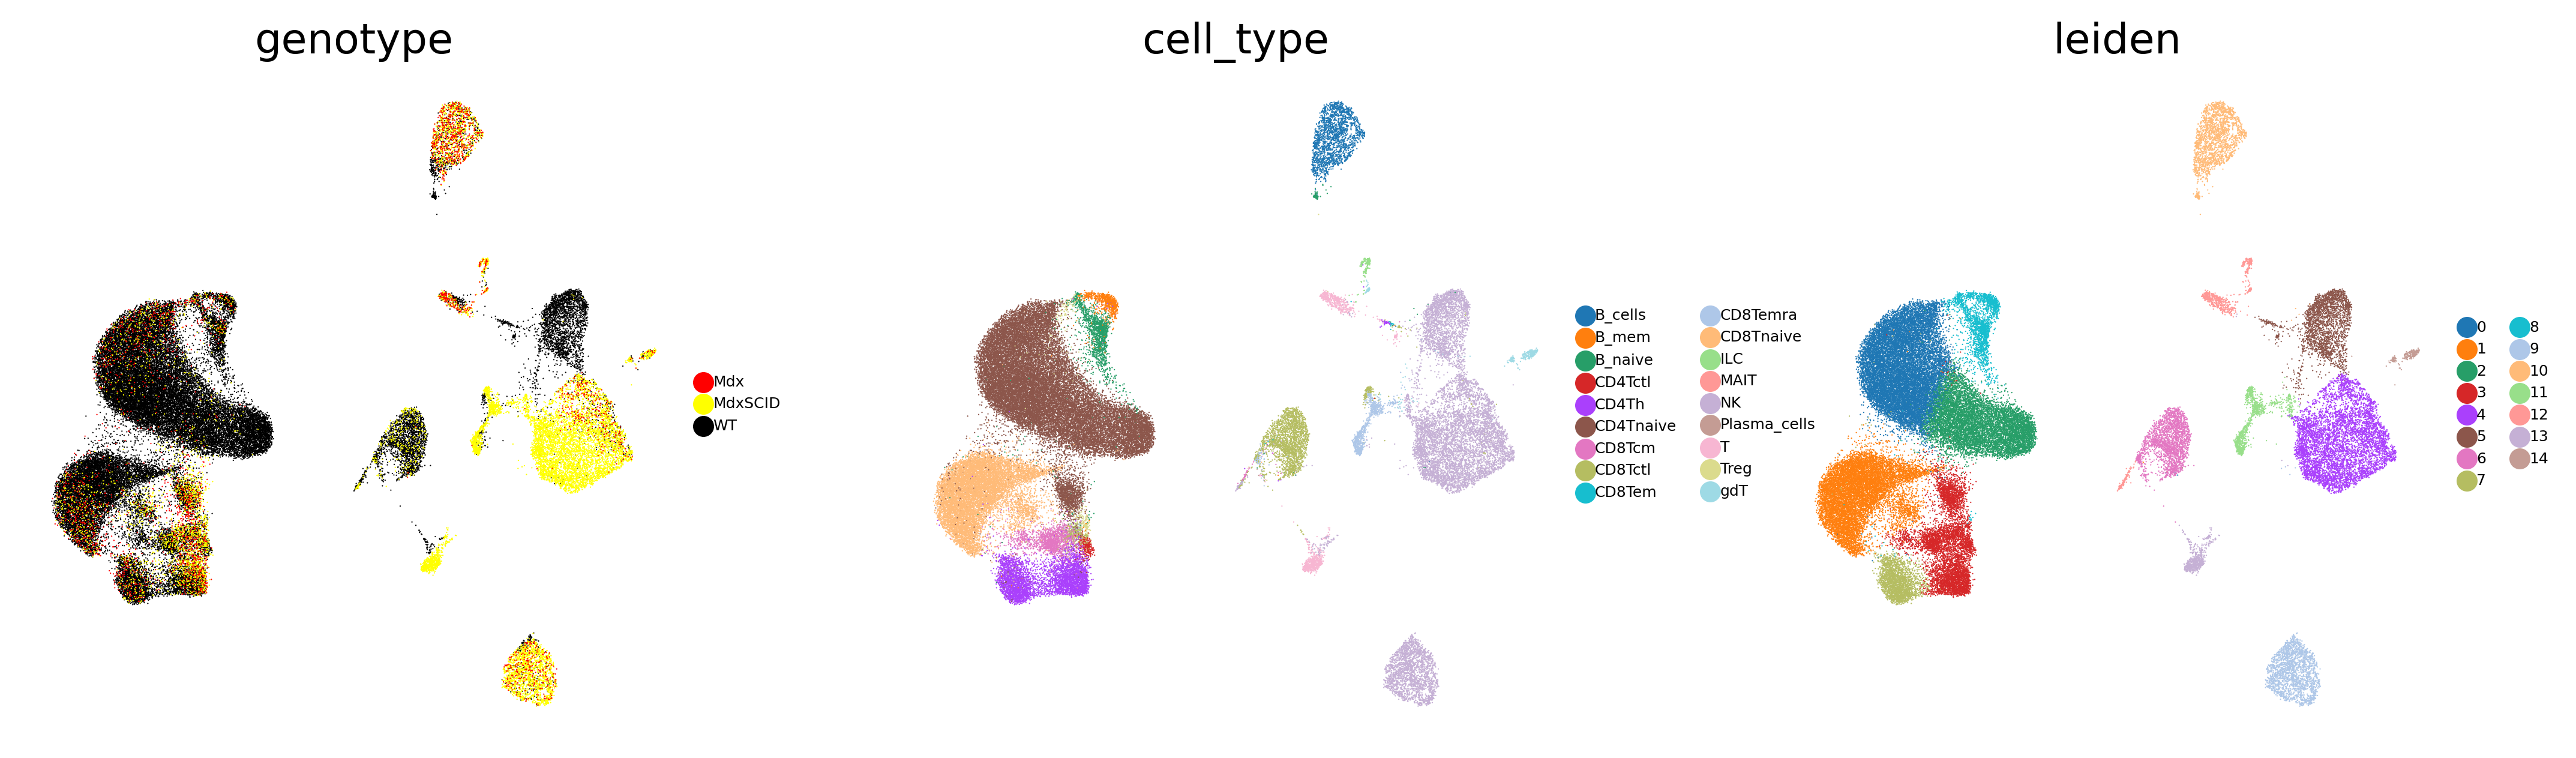

In [20]:
#sc.pp.neighbors(adata, use_rep = "X_scANVI", n_neighbors = 50, metric = 'minkowski')
#sc.tl.leiden(adata, resolution = 0.5, random_state = 1712)
sc.pl.umap(adata, frameon = False, color = ['genotype', 'cell_type', 'leiden'], size = 0.8, legend_fontsize = 5, ncols = 3)

### Evaluate clustering accuracy with `SCCAF`

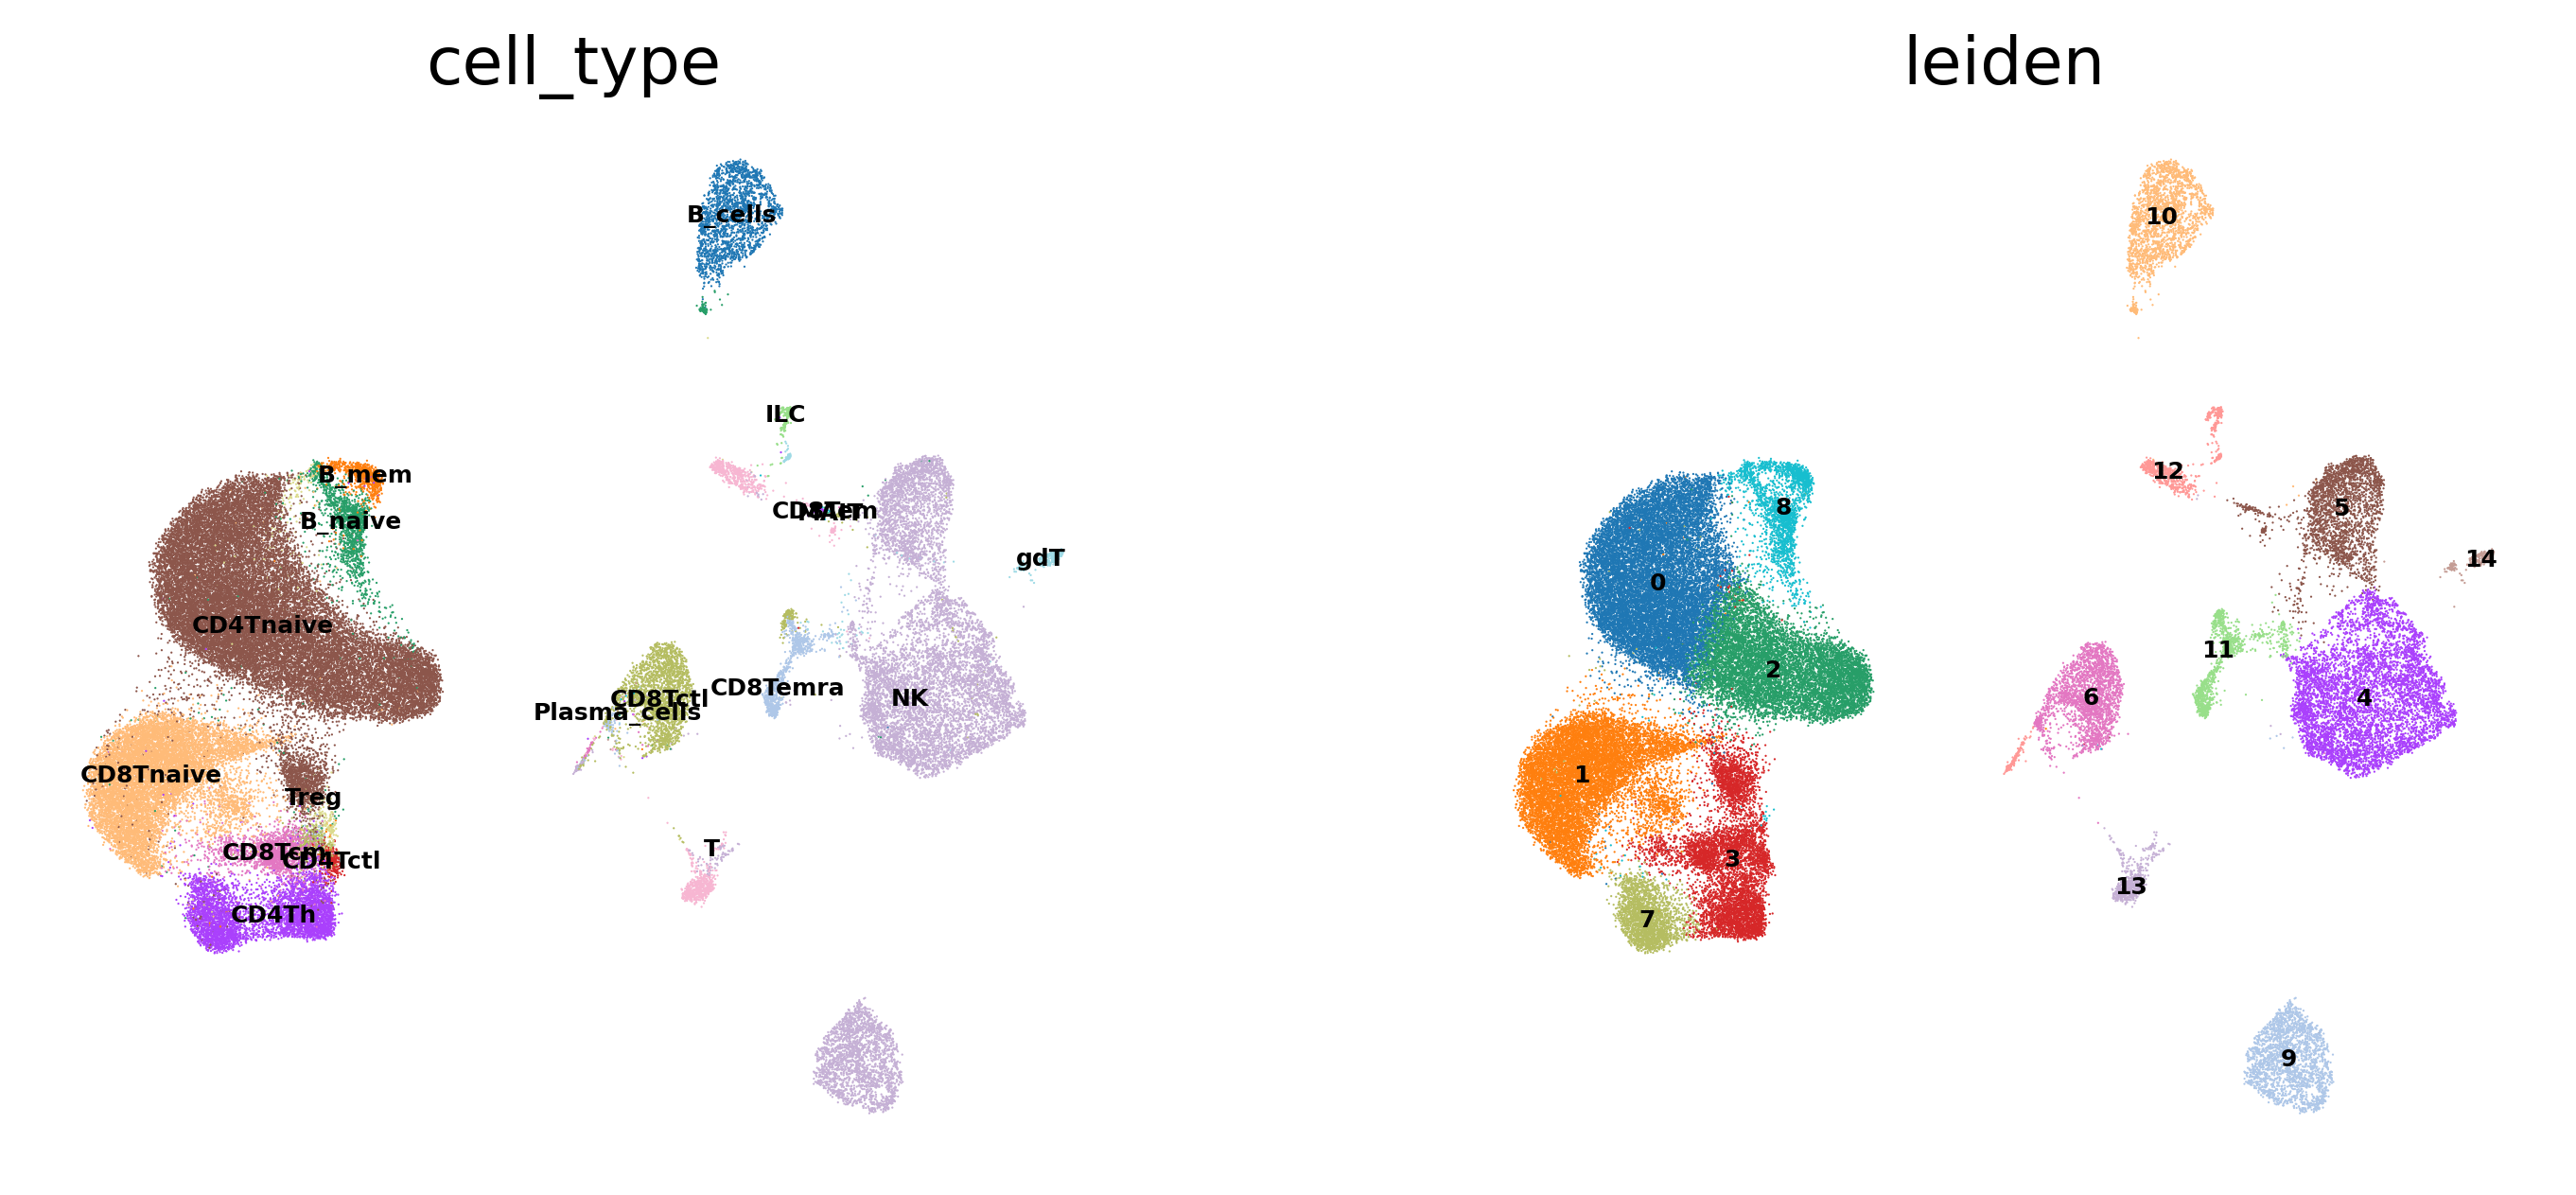

In [21]:
sc.pl.umap(adata, frameon = False, color = ['cell_type', 'leiden'], size = 0.8, legend_fontsize = 5, ncols = 3, legend_loc = 'on data')

In [17]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(adata.X, adata.obs['leiden'], n = 100)

/home/ruth/mambaforge/envs/scanpy/lib/python3.12/site-packages/SCCAF/__init__.py:249: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c_idx = df.groupby('class').apply(lambda x: msample(x, n=n, frac=frac)).index.get_level_values(None)
/home/ruth/mambaforge/envs/scanpy/lib/python3.12/site-packages/SCCAF/__init__.py:251: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return X[c_idx, :], X[d_idx, :], y[c_idx], y[d_idx]
/home/ruth/mambaforge/envs/scanpy/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRest

/home/ruth/mambaforge/envs/scanpy/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ruth/mambaforge/envs/scanpy/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ruth/mambaforge/envs/scanpy/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ruth/mambaforge/envs/scanpy/lib/python3.12/

Mean CV accuracy: 0.7133


/home/ruth/mambaforge/envs/scanpy/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy on the training set: 0.9993
Accuracy on the hold-out set: 0.5223


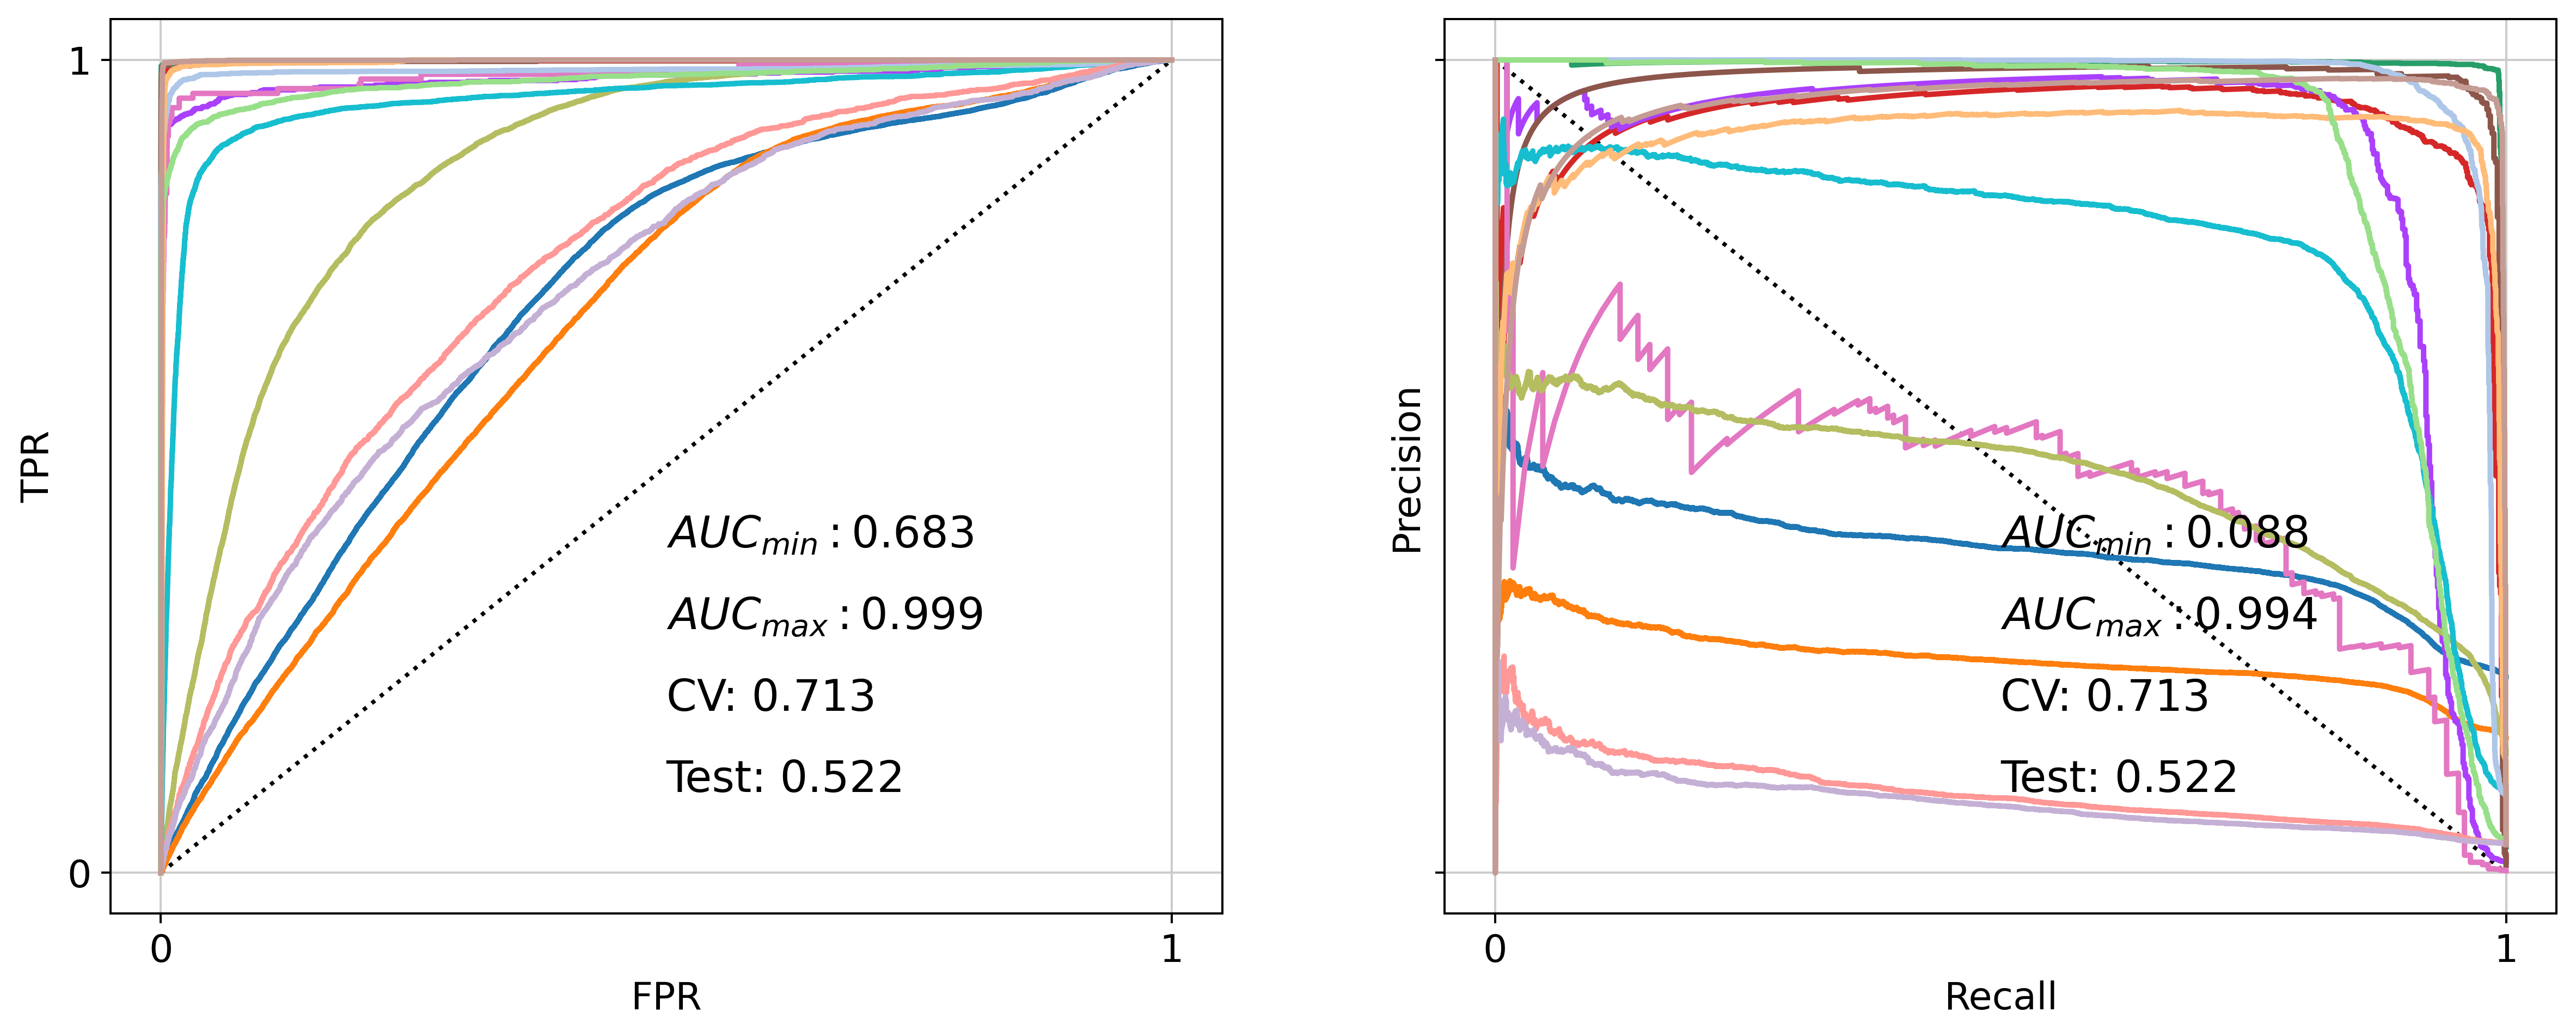

In [18]:
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

In [10]:
adata

AnnData object with n_obs × n_vars = 65544 × 16060
    obs: 'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_type', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment', 'leiden'
    var: 'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_

### Rename cluster based on the cell type annotation

### Calculate cluster-specific marker genes using _Wilcoxon's Rank Sum Test_

In [22]:
adata_log = adata.copy()
adata_log

AnnData object with n_obs × n_vars = 65544 × 16060
    obs: 'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_type', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment', 'leiden'
    var: 'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_

In [23]:
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)


- Split dataset per genotype

In [24]:
adata_log.obs['genotype'].cat.categories

Index(['Mdx', 'MdxSCID', 'WT'], dtype='object')

In [38]:
genotype = adata_log[adata_log.obs['genotype'].isin(['MdxSCID'])]
genotype

View of AnnData object with n_obs × n_vars = 13495 × 16060
    obs: 'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_type', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment', 'leiden'
    var: 'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD',

In [39]:
genotype.obs['cell_type'].value_counts()

cell_type
NK              7537
B_cells          905
CD8Temra         829
CD4Tnaive        748
T                744
CD4Th            736
CD8Tctl          503
CD8Tnaive        472
CD8Tcm           281
gdT              266
ILC              143
Treg             102
CD4Tctl           89
B_naive           80
B_mem             55
Plasma_cells       4
CD8Tem             1
Name: count, dtype: int64

In [40]:
genotype = genotype[~genotype.obs['cell_type'].isin(['CD8Tem'])]

In [41]:
sc.tl.rank_genes_groups(genotype, 'cell_type', method = 'wilcoxon', n_genes = 100, use_raw = False)
result = genotype.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

ranking genes


/home/ruth/mambaforge/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


B_cells_n  B_cells_l  B_cells_p  B_mem_n   B_mem_l       B_mem_p B_naive_n  \
0     Cd79a  12.433274        0.0    Fabp3  9.796565  8.384327e-20   Slc25a4   
1      Ebf1  12.761570        0.0    Cmss1  8.941768  1.662754e-16     Tnni3   
2      Igkc  10.745803        0.0     Myl3  8.955583  1.662754e-16      Myl3   
3      Ighm   6.166245        0.0   Camk1d  6.543585  1.662754e-16      Tpm1   
4      Ly6d  11.608175        0.0    Cox6c  2.882129  2.574629e-16    Cox6a2   
5      Cd37   6.132820        0.0    Tnni3  8.790603  3.117835e-16     Actc1   
6     Ms4a1  12.089648        0.0  Slc25a4  6.200608  3.920049e-16     Tnnc1   
7     Cd79b   9.461123        0.0     Tpm1  7.590077  5.059571e-16        Mb   
8      Ly6e   3.959486        0.0    Actc1  8.728186  1.852070e-15     Fabp3   
9      Ighd  10.713293        0.0     Myl2  8.256691  1.852070e-15      Myl2   

   B_naive_l     B_naive_p CD4Tctl_n  ...  Plasma_cells_p     T_n       T_l  \
0   6.387019  1.631524e-25    Camk1d  ...             1.0    Btg1  3.739723   
1   8.861911  5.156806e-25     Cmss1  ...             1.0    Mxd1  6.714923   
2   8.857304  8.358674e-25    Malat1  ...             1.0    Srgn  3.279724   
3   7.613479  1.559644e-24      Myl2  ...             1.0   Fxyd5  3.406960   
4   8.673193  2.158882e-24       Dcn  ...             1.0   Ptprc  3.090816   
5   8.811443  8.159247e-24        Mb  ...             1.0    Gmfg  3.883786   
6   8.505751  3.017420e-23      Myh6  ...             1.0    Cd52  3.661830   
7   8.520619  4.241960e-23       Gsn  ...             1.0     Emb  6.326579   
8   8.499666  4.641230e-23     Lars2  ...             1.0    Sell  6.956856   
9   8.152621  7.296589e-23      Gphn  ...             1.0  S100a9  7.758161   

             T_p   Treg_n    Treg_l        Treg_p    gdT_n     gdT_l  \
0  1.213770e-303   Camk1d  7.218988  3.667710e-45   S100a4  6.831210   
1  4.104651e-270    Cmss1  9.454909  3.734927e-44     Capg  5.952671   
2  1.988378e-268     Myl2  8.488524  1.090574e-38    Crip1  2.799558   
3  4.883069e-260       Mb  8.727774  1.166132e-37    Tppp3  5.839835   
4  4.883069e-260     Myh6  8.737840  9.755443e-35  S100a10  3.976943   
5  3.863422e-253   Atp2a2  6.498345  1.363212e-34   S100a6  4.894484   
6  1.012363e-250    Actc1  8.168017  1.033741e-31   Tagln2  3.434040   
7  6.642153e-247      Lpl  6.511949  1.033741e-31    Lyve1  5.250956   
8  3.147265e-242  Slc25a4  5.466966  6.269662e-29    Folr2  4.500117   
9  6.549414e-240     Tpm1  6.619916  2.004520e-28     Lmna  4.666657   

           gdT_p  
0  5.489187e-103  
1   4.076515e-81  
2   5.319063e-59  
3   1.552014e-55  
4   1.318165e-54  
5   1.914246e-54  
6   1.068271e-52  
7   7.912465e-51  
8   3.270567e-47  
9   3.710316e-45  

[10 rows x 48 columns]

In [42]:
wilcox_markers.to_csv('../data/DMD_MdxSCID_Lymphoid__ctl240527_WilcoxRST_markers.csv', sep = ',', index = False)

### Export annotated object

In [ ]:
adata

In [ ]:
adata.write('../data/heart_mm_nuclei-23-0092_scANVI-leiden_types_ctl231127.raw.h5ad')